In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

data_path = "Resources/COVID_final_datas.csv"


data = pd.read_csv(data_path)

data.head()

,Unnamed: 0,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude,Longitude
0,0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167,69.1833
1,1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275,19.8189
2,2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.000000,174.000000,170.000000,Algiers,36.7631,3.0506
3,3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5,1.5165
4,4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.000000,101.000000,94.635416,Luanda,-8.8383,13.2344


In [3]:
subset = data[['Country', 'Cases', 'Deaths', 'Deaths per 1000 Cases', 'Population 2019', 'Latitude']]
subset.head()

,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167
1,Albania,14730,407,27.63,2862427.0,41.3275
2,Algeria,52520,1779,33.87,43053054.0,36.7631
3,Andorra,2568,53,20.64,76177.0,42.5
4,Angola,5725,211,36.86,31825299.0,-8.8383


In [4]:
bins = [0, 109999, 799999, 2399999, 4949999, 8499999, 11499999, 18999999, 34999999, 79999999, 1500000000]
pop_ranges = ['up to 110k', '110k-799k','800k-2.39m', '2.4m-4.94m', '4.95m-8.49m', '8.5m-11.49m', '11.5m-18.9m', '20m-34.9m', '35m-79.9m', '70m-1.5b']
subset['Population Range'] = pd.cut(subset['Population 2019'], bins, labels=pop_ranges, include_lowest=True)
subset.head()

C:\Users\Adam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude,Population Range
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167,35m-79.9m
1,Albania,14730,407,27.63,2862427.0,41.3275,2.4m-4.94m
2,Algeria,52520,1779,33.87,43053054.0,36.7631,35m-79.9m
3,Andorra,2568,53,20.64,76177.0,42.5,up to 110k
4,Angola,5725,211,36.86,31825299.0,-8.8383,20m-34.9m


In [5]:
subset = subset.loc[subset['Latitude'] != 'Not Available']
subset['Latitude'].astype(float)


0      34.5167
1      41.3275
2      36.7631
3      42.5000
4      -8.8383
        ...   
194    10.5010
195    21.0333
196    15.3547
197   -15.4166
198   -17.8178
Name: Latitude, Length: 185, dtype: float64

In [6]:
#pop_range = '35m-79.9m'

group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
group_lat = group['Latitude'].sort_values()
group_lat_abs = group['Latitude'].apply(lambda x: float(x)).abs()

group_cases = group['Cases']
group_deaths = group['Deaths']
group_dp1k = group['Deaths per 1000 Cases']

NameError: name 'pop_range' is not defined

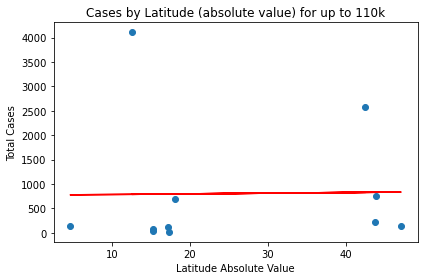

r-squared : 0.0
Correlation Coefficient : 0.02
-------------------------------------------------------


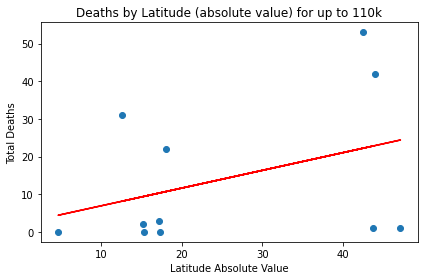

r-squared : 0.14
Correlation Coefficient : 0.02
-------------------------------------------------------


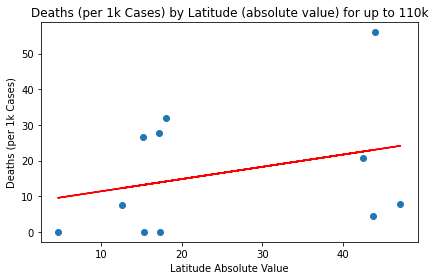

r-squared : 0.09
Correlation Coefficient : 0.02


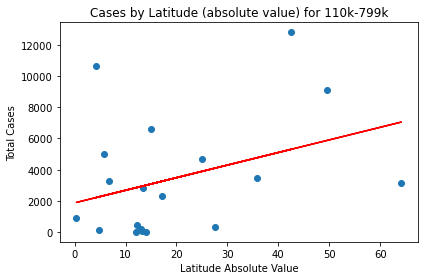

r-squared : 0.13
Correlation Coefficient : 0.36
-------------------------------------------------------


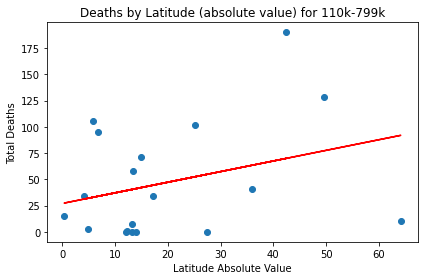

r-squared : 0.1
Correlation Coefficient : 0.36
-------------------------------------------------------


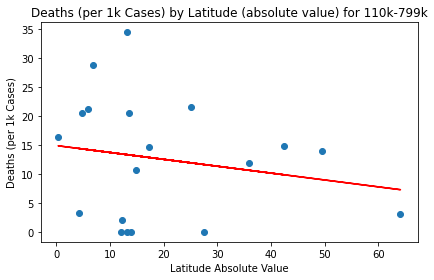

r-squared : 0.04
Correlation Coefficient : 0.36


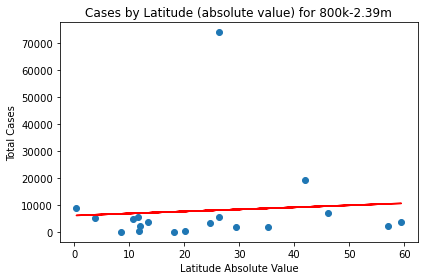

r-squared : 0.01
Correlation Coefficient : 0.08
-------------------------------------------------------


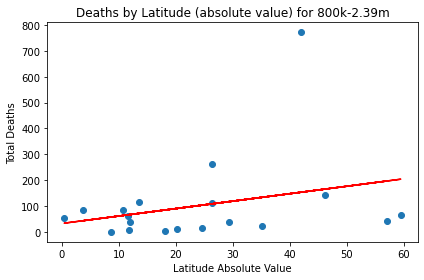

r-squared : 0.08
Correlation Coefficient : 0.08
-------------------------------------------------------


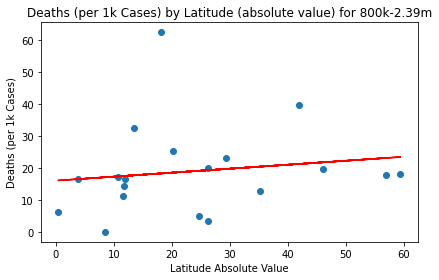

r-squared : 0.02
Correlation Coefficient : 0.08


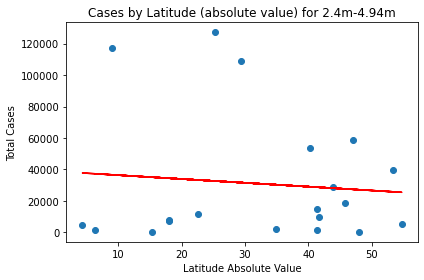

r-squared : 0.01
Correlation Coefficient : -0.1
-------------------------------------------------------


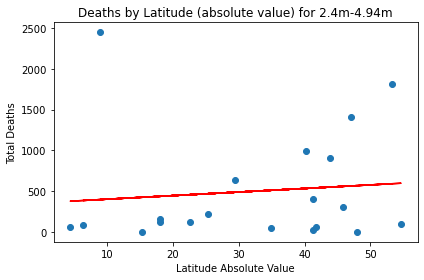

r-squared : 0.01
Correlation Coefficient : -0.1
-------------------------------------------------------


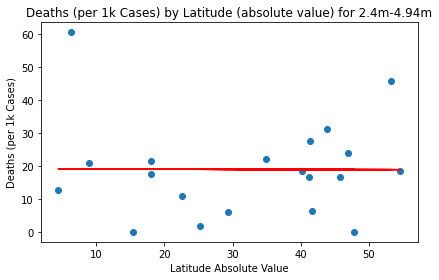

r-squared : 0.0
Correlation Coefficient : -0.1


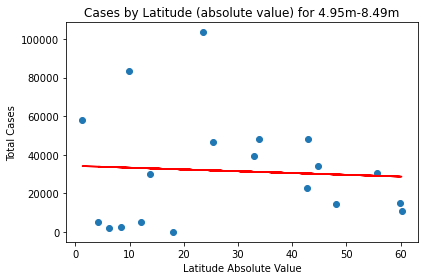

r-squared : 0.0
Correlation Coefficient : -0.06
-------------------------------------------------------


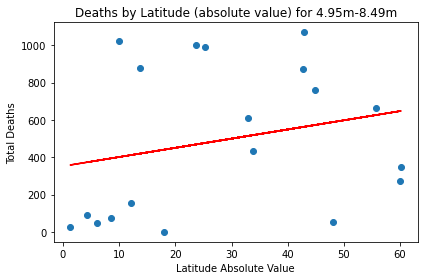

r-squared : 0.06
Correlation Coefficient : -0.06
-------------------------------------------------------


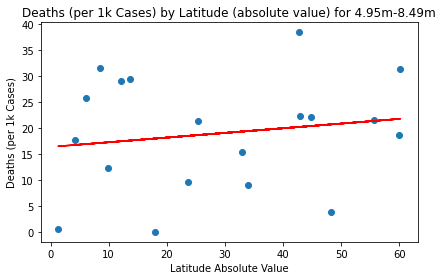

r-squared : 0.03
Correlation Coefficient : -0.06


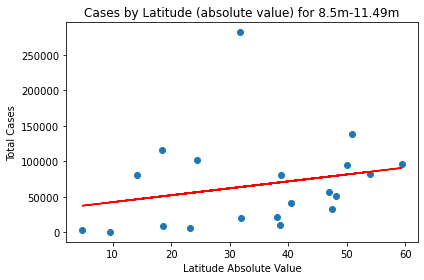

r-squared : 0.06
Correlation Coefficient : 0.23
-------------------------------------------------------


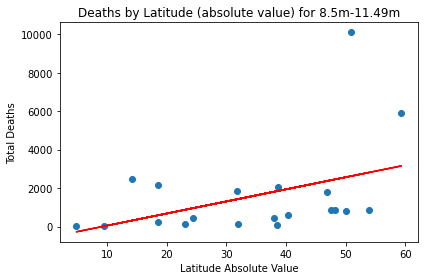

r-squared : 0.17
Correlation Coefficient : 0.23
-------------------------------------------------------


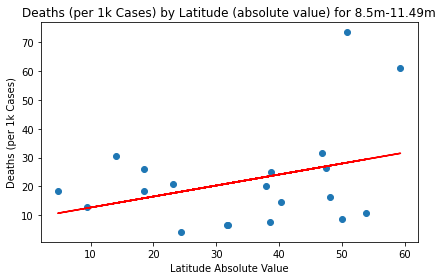

r-squared : 0.12
Correlation Coefficient : 0.23


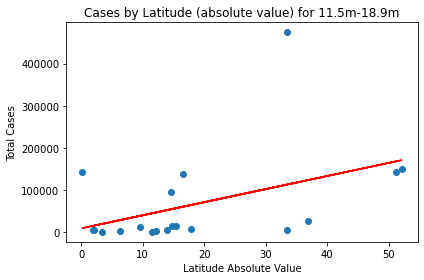

r-squared : 0.18
Correlation Coefficient : 0.43
-------------------------------------------------------


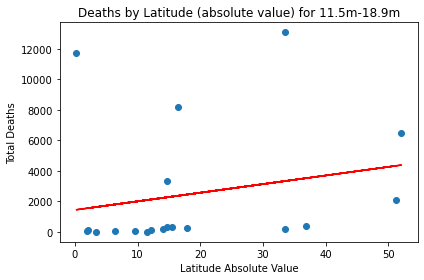

r-squared : 0.04
Correlation Coefficient : 0.43
-------------------------------------------------------


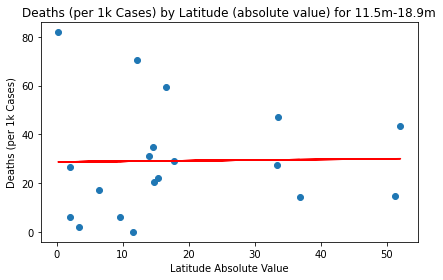

r-squared : 0.0
Correlation Coefficient : 0.43


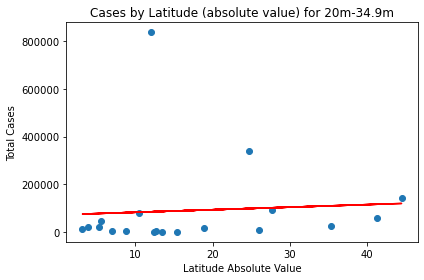

r-squared : 0.0
Correlation Coefficient : 0.07
-------------------------------------------------------


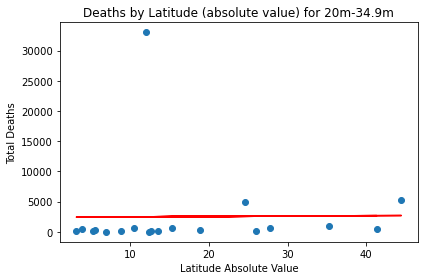

r-squared : 0.0
Correlation Coefficient : 0.07
-------------------------------------------------------


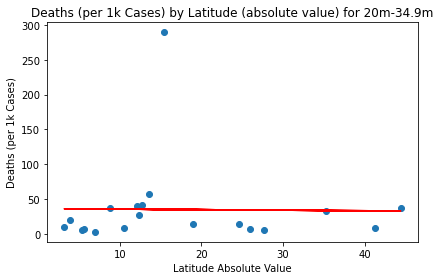

r-squared : 0.0
Correlation Coefficient : 0.07


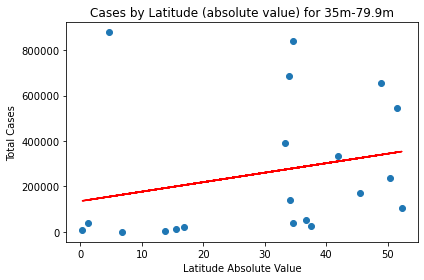

r-squared : 0.06
Correlation Coefficient : 0.24
-------------------------------------------------------


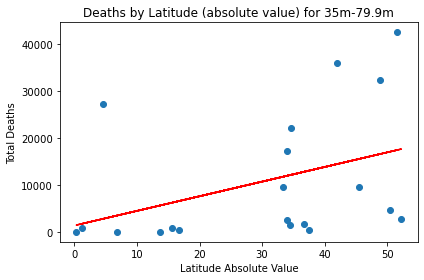

r-squared : 0.16
Correlation Coefficient : 0.24
-------------------------------------------------------


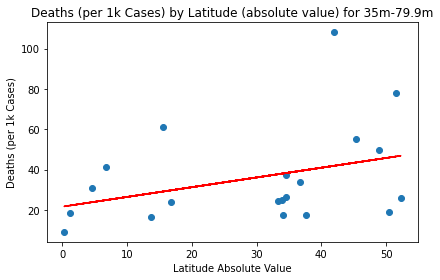

r-squared : 0.12
Correlation Coefficient : 0.24


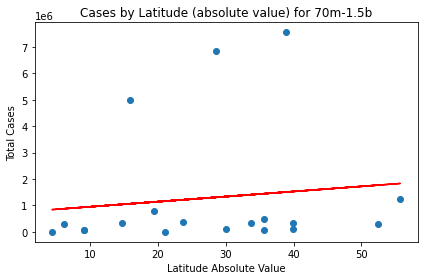

r-squared : 0.02
Correlation Coefficient : 0.12
-------------------------------------------------------


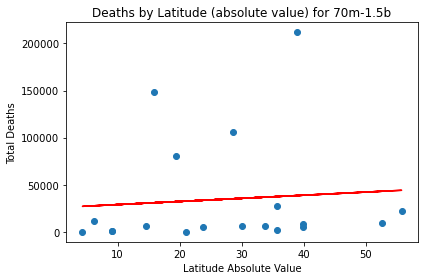

r-squared : 0.01
Correlation Coefficient : 0.12
-------------------------------------------------------


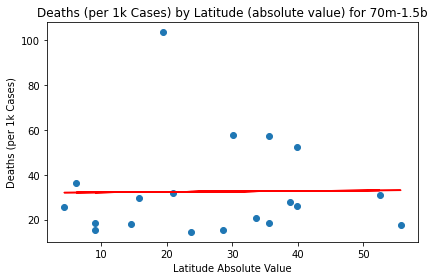

r-squared : 0.0
Correlation Coefficient : 0.12


In [7]:
case_cc_list = []
case_rs_list = []

deaths_cc_list = []
deaths_rs_list = []

mortality_cc_list = []
mortality_rs_list = []


for pop_range in pop_ranges:


    group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
    group_lat = group['Latitude'].sort_values()
    group_lat_abs = group['Latitude'].apply(lambda x: float(x)).abs()

    group_cases = group['Cases']
    group_deaths = group['Deaths']
    group_dp1k = group['Deaths per 1000 Cases']


    plt.scatter(group_lat_abs, group_cases)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Total Cases')
    plt.title(f'Cases by Latitude (absolute value) for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_cases)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')

    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Cases for{pop_range}.png')
    plt.show()
    
    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_cases)[0],2)
    case_cc_list.append(cc)
    case_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")
    print('-------------------------------------------------------')
    
    #-------------------------------------------------------------------------------------------------------------------------
  
    plt.scatter(group_lat_abs, group_deaths)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Total Deaths')
    plt.title(f'Deaths by Latitude (absolute value) for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_deaths)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')


    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Deaths for{pop_range}.png')
    plt.show()

    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_cases)[0],2)
    deaths_cc_list.append(cc)
    deaths_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")
    print('-------------------------------------------------------')
    #-------------------------------------------------------------------------------------------------------------------------
    plt.subplots()
    plt.scatter(group_lat_abs, group_dp1k)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Deaths (per 1k Cases)')
    plt.title(f'Deaths (per 1k Cases) by Latitude (absolute value) for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_dp1k)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')


    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Mortality for{pop_range}.png')
    plt.show()

    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_cases)[0],2)
    mortality_cc_list.append(cc)
    mortality_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")



In [8]:
cc_df = pd.DataFrame(list(zip(pop_ranges, case_cc_list, deaths_cc_list, mortality_cc_list)),
                       columns = ['Population', 'Cases', 'Deaths','Mortality'])
cc_df.set_index('Population')

,Cases,Deaths,Mortality
Population,,,
up to 110k,0.02,0.02,0.02
110k-799k,0.36,0.36,0.36
800k-2.39m,0.08,0.08,0.08
2.4m-4.94m,-0.10,-0.10,-0.10
4.95m-8.49m,-0.06,-0.06,-0.06
8.5m-11.49m,0.23,0.23,0.23
11.5m-18.9m,0.43,0.43,0.43
20m-34.9m,0.07,0.07,0.07
35m-79.9m,0.24,0.24,0.24


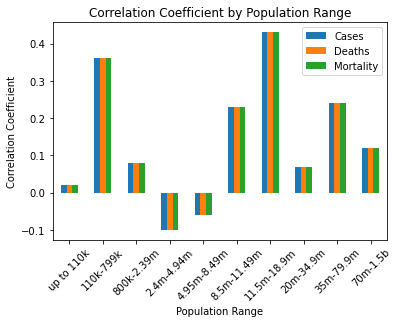

In [9]:
cc_df.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient by Population Range')
ticks = range(0, 10)
plt.xticks(ticks, labels=pop_ranges, rotation=45)

plt.savefig('Images/correlation coefficient by pop.png')
plt.show()

In [10]:
rs_df = pd.DataFrame(list(zip(pop_ranges, case_rs_list, deaths_rs_list, mortality_rs_list)),
                       columns = ['Population', 'Cases', 'Deaths','Mortality'])
rs_df.set_index('Population')

,Cases,Deaths,Mortality
Population,,,
up to 110k,0.00,0.14,0.09
110k-799k,0.13,0.10,0.04
800k-2.39m,0.01,0.08,0.02
2.4m-4.94m,0.01,0.01,0.00
4.95m-8.49m,0.00,0.06,0.03
8.5m-11.49m,0.06,0.17,0.12
11.5m-18.9m,0.18,0.04,0.00
20m-34.9m,0.00,0.00,0.00
35m-79.9m,0.06,0.16,0.12


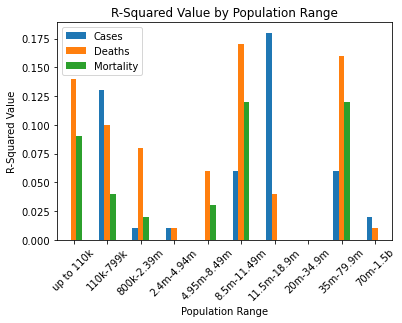

In [11]:
rs_df.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('R-Squared Value')
plt.title('R-Squared Value by Population Range')
ticks = range(0, 10)
plt.xticks(ticks, labels=pop_ranges, rotation=45)

plt.savefig('Images/rs value by pop.png')
plt.show()

In [12]:
pop_group = subset.groupby('Population Range')
avg_deaths = pop_group['Deaths per 1000 Cases'].mean()

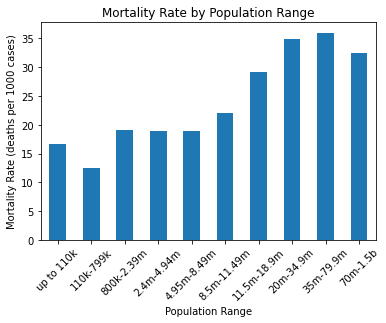

In [13]:
avg_deaths.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('Mortality Rate (deaths per 1000 cases)')
plt.title('Mortality Rate by Population Range')
plt.xticks(rotation=45)
plt.savefig('Images/mortality by pop.png')
plt.show()